In [1]:
# One-Sample t-Test with Python

# Import necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Generate the dataset based on the given rule

# last two digits of My ID = 76

k = 76

# Generate 12 exam scores: 60 + randint(0,15,size=12) + (k % 5)

np.random.seed(0)  # for reproducibility
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k % 5)

# Display the dataset
print("Sample Exam Scores:", exam_scores)

Sample Exam Scores: [73 66 61 64 72 64 68 70 64 66 63 65]


In [8]:
# 1. State the Hypothesis

# H0: The population mean is equal to 65
# H1: The population mean is different from 65

hypothesized_mean = 65


In [9]:
# 2. Perform the one-sample t-test

t_statistic, p_value = stats.ttest_1samp(exam_scores, popmean=hypothesized_mean)
sample_mean = np.mean(exam_scores)
df = len(exam_scores) - 1

print("\nSample Mean:", sample_mean)
print("Hypothesized Mean:", hypothesized_mean)
print("t-Statistic:", t_statistic)
print("Degrees of Freedom:", df)
print("p-Value:", p_value)


Sample Mean: 66.33333333333333
Hypothesized Mean: 65
t-Statistic: 1.2480072611542747
Degrees of Freedom: 11
p-Value: 0.23794057357164994


In [10]:
# 3. Compute the 95% Confidence Interval

confidence_level = 0.95
sem = stats.sem(exam_scores)  # Standard Error of the Mean
ci = stats.t.interval(confidence_level, df, loc=sample_mean, scale=sem)
print("\n95% Confidence Interval for Sample Mean:", ci)


95% Confidence Interval for Sample Mean: (np.float64(63.98186714282707), np.float64(68.68479952383959))


In [11]:
# 4. Decision based on alpha = 0.05

alpha = 0.05
if p_value < alpha:
    decision = "Reject H0: The population mean is significantly different from 65."
else:
    decision = "Fail to reject H0: No significant difference from 65."

print("\nDecision:", decision)


Decision: Fail to reject H0: No significant difference from 65.


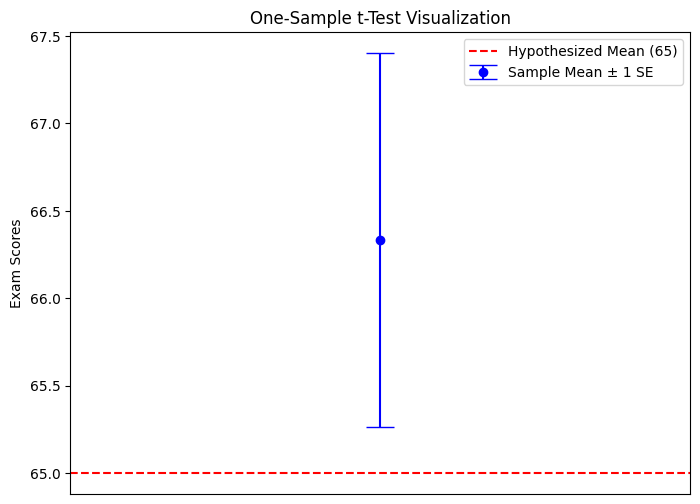

In [12]:
# 5. Visualization

plt.figure(figsize=(8,6))
plt.errorbar(x=[0], y=[sample_mean], yerr=[sem], fmt='o', capsize=10, label='Sample Mean ± 1 SE', color='blue')
plt.axhline(hypothesized_mean, color='red', linestyle='--', label='Hypothesized Mean (65)')
plt.xlim(-1,1)
plt.xticks([])
plt.ylabel('Exam Scores')
plt.title('One-Sample t-Test Visualization')
plt.legend()
plt.show()